# Statistical Analysis + ML Learning Methods
## Data Group 2 (CONTROL DATA)

Author: Yahriel Salinas-Reyes

## Importing basic, statistics, and machine learning packages

In [1]:
# Basic packages
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors      

# Makes some plots look nicer
import seaborn as sns

# Statistical packages
import statsmodels.api as sm
from statsmodels.formula.api import ols   # ordinary least squares model 
import statsmodels.stats.multicomp        # option for ANOVA, not used yet

# The machine learning modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve 
from sklearn import svm
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [12]:
# Read In Data
df = pd.read_csv("MEMS Design Data.csv")
# Get the data into a pandas dateframe.  
#df = pd.read_csv('Yaya.csv', 
#                 header=1, ## NOTE: The second line contains column names, so we skip the first line
#                 sep='\t') ## NOTE: Pandas automatically detects delimeters, but it never hurts to be specific
#df.drop('Group', axis=0, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
#df.drop(columns=['Group', 'Set', 'AbsJ', 'J', 'I', 't', 'R'])
#df.drop(columns=['Group'])

df.head()



,voltage_Calibrate,absJ_Calibrate,J_Calibrate,current_Calibrate,time_Calibrate,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,dR/dX,GF,dR/R_0,Strain,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,0.00,0.000439,0.000439,1.700000e-09,0.000,NaN,NaN,Voltage,Final AbsJ,Final J,...,kOhm/mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,6.970000,6.970000,2.700000e-05,0.770,NaN,NaN,0,2.10E-04,3.70E-04,...,0.0018,0.030835,0.007576,0.245687,NaN,NaN,NaN,NaN,NaN,NaN
2,0.10,13.900000,13.900000,5.400000e-05,0.958,NaN,NaN,0.05,8.70E+00,6.97E+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.15,20.900000,20.900000,8.090000e-05,1.150,NaN,NaN,0.1,1.74E+01,1.39E+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.20,27.800000,27.800000,1.080000e-04,1.720,NaN,NaN,0.15,2.60E+01,2.09E+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


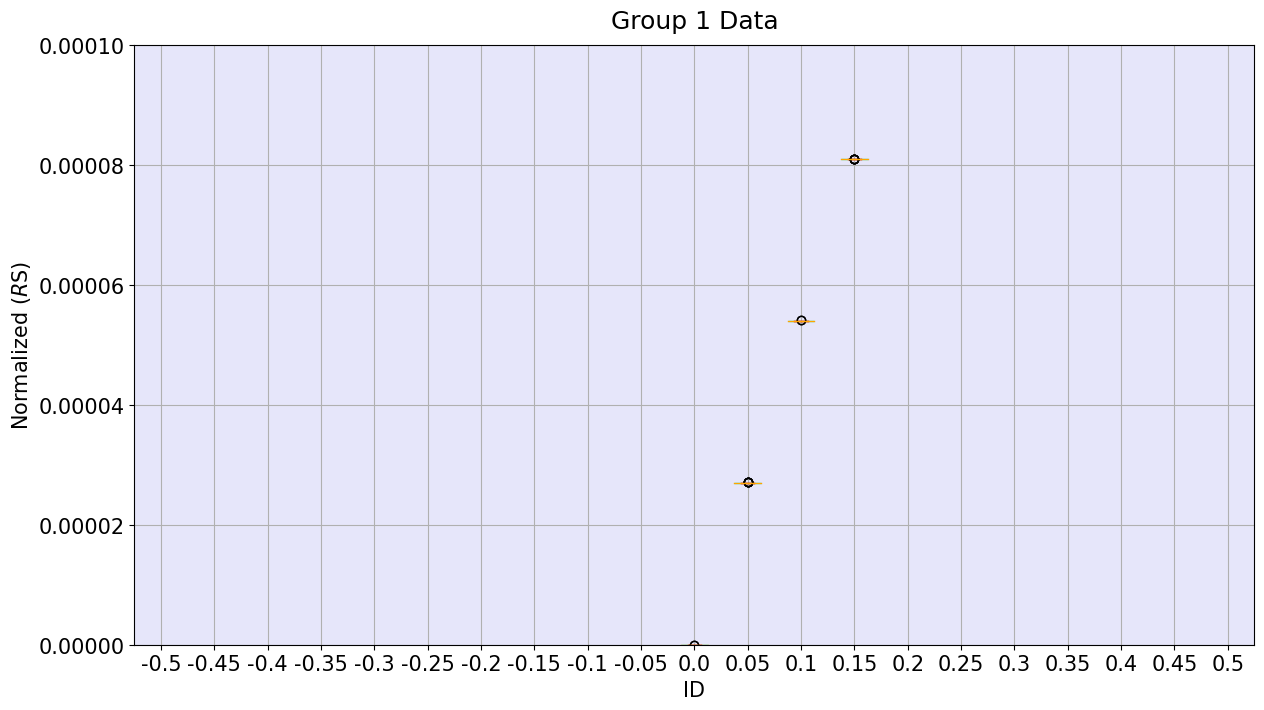

In [17]:

# this makes a box plot sorted by experiment
# boxplot is an axes object
# It was a hassle to figure out how to edit the colors for the boxes
# Turning on patch_artist applies some default colors 

boxplot = df.boxplot('current_Calibrate', by='voltage_Calibrate', vert=True, patch_artist=True,   
            boxprops=dict(facecolor='red', color='cyan'), # doesn't work 
            capprops=dict(color='red'),                   # works
            whiskerprops=dict(color='red'),               # doesn't work
            medianprops=dict(color='orange'),             # does not work
            figsize=(14,8))                               # works

fig = boxplot.get_figure()                                # a work around to get rid of annoying auto-title
fig.suptitle('')

boxplot.patch.set_facecolor('lavender')         # Changes plot background
# plt.style.use('seaborn') # Does not do anything

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel('ID', font)
plt.ylabel(r'Normalized ($R$S)', font)
plt.ylim(0,.0001)
plt.title('Group 1 Data', fontsize=18, pad = 12)
plt.show()